In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from heapq import nlargest
from sklearn.metrics import f1_score
from sklearn import tree
from scipy.stats import iqr
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
from ipynb.fs.defs.BOS_Wrapper import BOS_Classifier
from ipynb.fs.defs.NLP_Classifier import NLP_Classifier
from ipynb.fs.defs.Optimized_Classifiers import optimized_rf, optimized_tree, optimized_svm, optimized_knn, optimized_grad, optimized_logistic, optimized_ridge, optimized_nb

In [4]:
y = []
X = {'metadata': [], 'statistics' : [], 'timeseries' : []}

path = ""

# calcoliamo le features di ogni timeseries

with open(path + 'ThingspeakEU.meta.csv', 'r', encoding='utf-8') as dati:
    for row in dati:
        riga = row.strip().split(',')
        
        classe = int(riga[8])
        y.append(classe)
        
        valori = np.array(riga[9:]).astype(np.float)
        X['timeseries'].append(valori)
        
        # metadati
        stream_name = riga[1]
        X['metadata'].append(stream_name)
        
        # statistiche
        valori = np.array(riga[9:]).astype(np.float)
        media = np.mean(valori)
        mediana = np.median(valori)
        maxim = np.max(valori)
        minim = np.min(valori)
        std_dev = np.std(valori)
        rms = np.sqrt(np.mean(np.square(valori)))
        quantile = np.quantile(valori, 0.4)
        i_q_r = iqr(valori)
        simmetria = skew(valori)
        curtosi = kurtosis(valori)
        rang = maxim - minim
        
        features = [rang, maxim, std_dev, rms, media, minim, quantile, mediana, curtosi, simmetria, i_q_r] 
        X['statistics'].append(features)
    
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [23]:
rf = BOS_Classifier(eval(optimized_rf('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_rf = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_tree('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_tree = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_knn('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_knn = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_svm('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_svm = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_logistic('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_logistic = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_grad('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_grad = accuracy(y_pred, y_test)

rf = BOS_Classifier(eval(optimized_nb('ThingspeakEU.meta.csv')))
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_nb = accuracy(y_pred, y_test)

rf = NLP_Classifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
acc_nlp = accuracy(y_pred, y_test)

In [22]:
def accuracy(y_pred, y_test):
    
    acc = []
    tot = len(y_test)
    
    for i in range(1, 22):
        match = 0
        for pred, test in zip(y_pred, y_test):
            classes = nlargest(i, set(y), key = lambda x : pred[x])
            if (test in classes):
                match = match + 1
        acc.append((match/tot)*100)
    
    return acc

In [19]:
import matplotlib.pyplot as plt

In [20]:
labels = np.arange(1, 22)

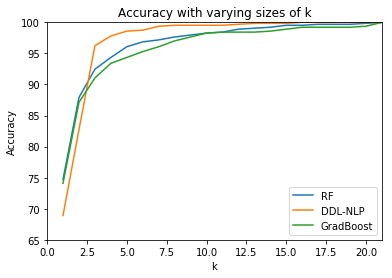

In [36]:
plt.plot(labels, acc_rf, label='RF')
plt.plot(labels, acc_nlp, label='DDL-NLP')
plt.plot(labels, acc_grad, label='GradBoost')
plt.axis([0, 21, 65, 100])
plt.title('Accuracy with varying sizes of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('k_test.png', bbox_inches='tight',pad_inches = 0, dpi = 200)